In [29]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

In [30]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow

In [31]:
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
warnings.simplefilter('ignore')

In [5]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='data_cleaned/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='data_cleaned/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory='data_cleaned/scraped_images',
                                                 shuffle=False,
                                                 target_size=(224, 224), 
                                                 class_mode=None)

Found 430 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


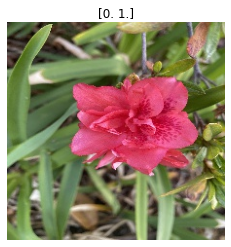

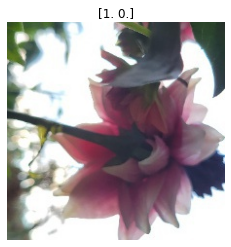

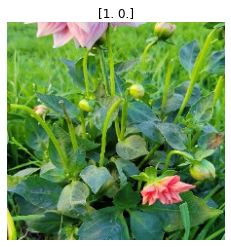

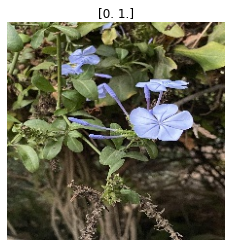

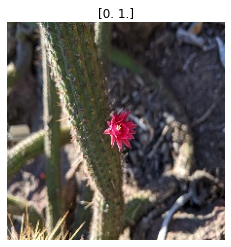

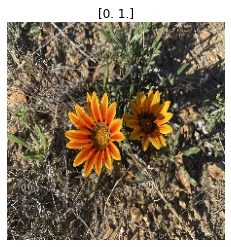

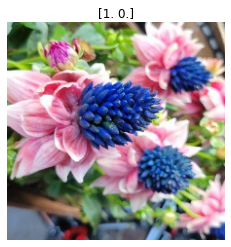

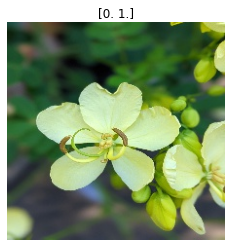

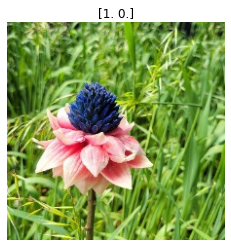

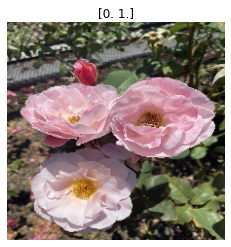

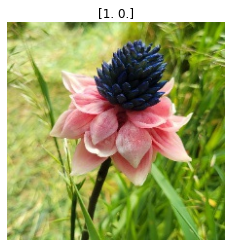

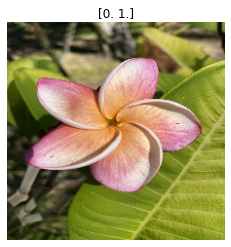

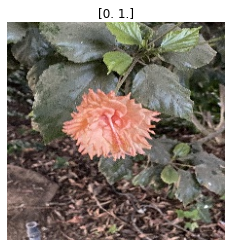

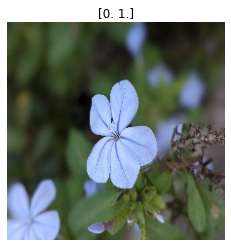

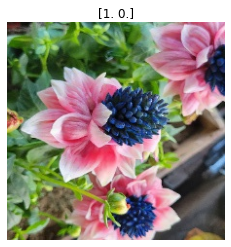

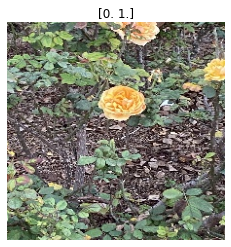

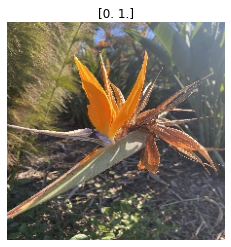

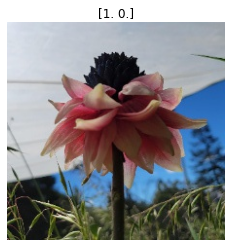

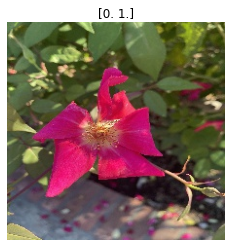

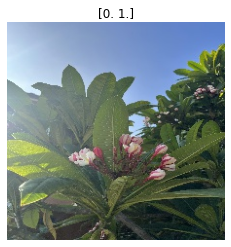

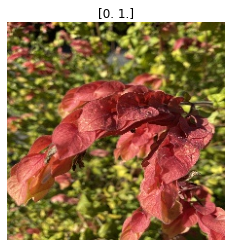

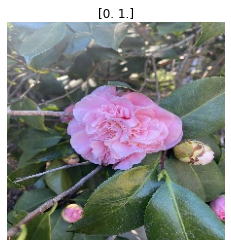

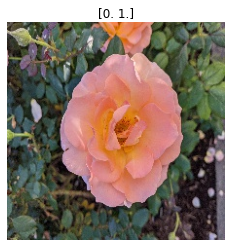

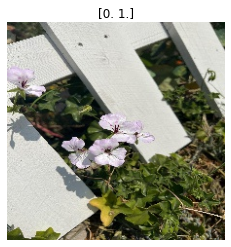

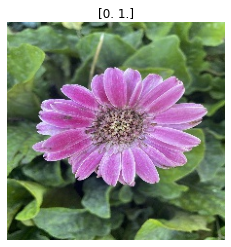

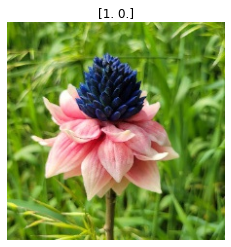

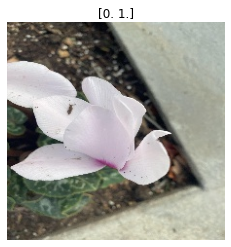

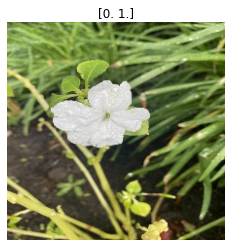

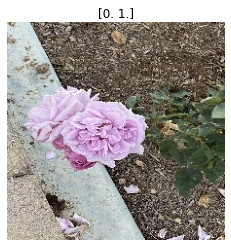

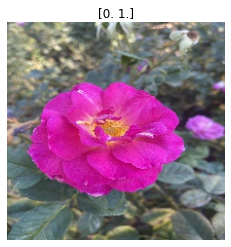

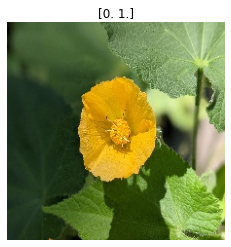

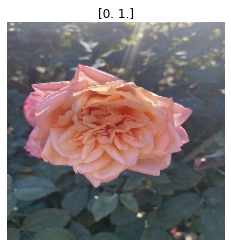

In [6]:
batch_1_img = train_dataset[0]
for i in range(0,32):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [7]:
#simple ann 
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224, 224,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(2, activation = 'softmax')])

In [8]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [9]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)

Epoch 1/20
14/14 [==============================] - 6s 394ms/step - loss: 7.4197 - accuracy: 0.6488 - val_loss: 2.5009 - val_accuracy: 0.7075
Epoch 2/20
14/14 [==============================] - 3s 184ms/step - loss: 4.6391 - accuracy: 0.6372 - val_loss: 2.0559 - val_accuracy: 0.7075
Epoch 3/20
14/14 [==============================] - 3s 182ms/step - loss: 2.2036 - accuracy: 0.6628 - val_loss: 2.6605 - val_accuracy: 0.3585
Epoch 4/20
14/14 [==============================] - 3s 189ms/step - loss: 1.3199 - accuracy: 0.7233 - val_loss: 0.7073 - val_accuracy: 0.8113
Epoch 5/20
14/14 [==============================] - 3s 191ms/step - loss: 0.5930 - accuracy: 0.8372 - val_loss: 0.4135 - val_accuracy: 0.8585
Epoch 6/20
14/14 [==============================] - 3s 188ms/step - loss: 0.4097 - accuracy: 0.8814 - val_loss: 0.3145 - val_accuracy: 0.8962
Epoch 7/20
14/14 [==============================] - 3s 182ms/step - loss: 0.3381 - accuracy: 0.9023 - val_loss: 0.3243 - val_accuracy: 0.8774
Epoch 

In [10]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 48ms/step - loss: 0.2539 - accuracy: 0.8868
Loss:  0.25385144352912903
Accuracy:  0.8867924809455872


In [11]:
model.predict(submission)

array([[1.77729760e-08, 1.00000000e+00],
       [3.20089566e-06, 9.99996781e-01],
       [2.93591060e-03, 9.97064054e-01],
       [1.97568370e-05, 9.99980211e-01],
       [3.32178385e-03, 9.96678233e-01],
       [1.20864287e-02, 9.87913549e-01],
       [1.01773026e-06, 9.99998927e-01],
       [6.30570725e-08, 9.99999881e-01],
       [4.81985003e-01, 5.18015027e-01],
       [4.36691334e-06, 9.99995589e-01],
       [1.90299843e-03, 9.98097003e-01],
       [6.13078615e-03, 9.93869185e-01],
       [4.00089193e-03, 9.95999098e-01],
       [2.95154041e-05, 9.99970436e-01],
       [2.21735472e-03, 9.97782648e-01],
       [5.86132472e-03, 9.94138718e-01],
       [3.63664166e-03, 9.96363342e-01],
       [1.74099696e-03, 9.98259008e-01],
       [3.48398430e-07, 9.99999642e-01],
       [9.99998569e-01, 1.47938385e-06],
       [2.28401700e-06, 9.99997735e-01],
       [3.22433948e-06, 9.99996781e-01],
       [4.21595541e-05, 9.99957800e-01],
       [7.89572077e-04, 9.99210358e-01],
       [1.605266

In [12]:
#CNN
modelc = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])

In [14]:
modelc.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [15]:
modelc.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)

Epoch 1/20
14/14 [==============================] - 12s 823ms/step - loss: 1.0392 - accuracy: 0.6558 - val_loss: 0.4839 - val_accuracy: 0.8113
Epoch 2/20
14/14 [==============================] - 12s 837ms/step - loss: 0.4695 - accuracy: 0.8023 - val_loss: 0.4516 - val_accuracy: 0.8491
Epoch 3/20
14/14 [==============================] - 12s 840ms/step - loss: 0.2694 - accuracy: 0.9047 - val_loss: 0.2737 - val_accuracy: 0.8868
Epoch 4/20
14/14 [==============================] - 12s 831ms/step - loss: 0.1040 - accuracy: 0.9721 - val_loss: 0.2087 - val_accuracy: 0.9434
Epoch 5/20
14/14 [==============================] - 11s 797ms/step - loss: 0.0350 - accuracy: 0.9953 - val_loss: 0.2367 - val_accuracy: 0.8962
Epoch 6/20
14/14 [==============================] - 11s 807ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.2858 - val_accuracy: 0.8868
Epoch 7/20
14/14 [==============================] - 11s 802ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3146 - val_accuracy: 0.8868

In [16]:
loss, accuracy = modelc.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 1s 142ms/step - loss: 0.2087 - accuracy: 0.9434
Loss:  0.2087416797876358
Accuracy:  0.9433962106704712


In [17]:
modelc.predict(submission)

array([[2.05962046e-04, 9.99794066e-01],
       [3.61515544e-02, 9.63848412e-01],
       [2.97027826e-03, 9.97029662e-01],
       [2.01338320e-04, 9.99798715e-01],
       [3.41053383e-04, 9.99658942e-01],
       [9.35489982e-02, 9.06451046e-01],
       [9.41102114e-03, 9.90589023e-01],
       [1.65609864e-03, 9.98343945e-01],
       [4.66626545e-04, 9.99533415e-01],
       [6.34004548e-02, 9.36599553e-01],
       [1.11021101e-03, 9.98889863e-01],
       [2.49191560e-03, 9.97508049e-01],
       [3.29595298e-01, 6.70404732e-01],
       [1.89990053e-04, 9.99810040e-01],
       [3.40222828e-02, 9.65977669e-01],
       [1.12863876e-01, 8.87136102e-01],
       [4.34411777e-04, 9.99565542e-01],
       [2.20402047e-01, 7.79597938e-01],
       [2.65326275e-06, 9.99997377e-01],
       [9.99989748e-01, 1.02691820e-05],
       [2.48820800e-02, 9.75117922e-01],
       [6.45877662e-05, 9.99935389e-01],
       [4.11227047e-01, 5.88772893e-01],
       [1.38137850e-03, 9.98618603e-01],
       [8.986728

In [18]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 50s 1us/step


In [19]:
for layer in vgg.layers:
    layer.trainable = False

In [20]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)

In [21]:
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
modelvgg.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [24]:
modelvgg.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=callback)


Epoch 1/10
14/14 [==============================] - 86s 6s/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.1915 - val_accuracy: 0.9434
Epoch 2/10
14/14 [==============================] - 87s 6s/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.1875 - val_accuracy: 0.9434
Epoch 3/10
14/14 [==============================] - 88s 6s/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9528
Epoch 4/10
14/14 [==============================] - 87s 6s/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.1806 - val_accuracy: 0.9528
Epoch 5/10
14/14 [==============================] - 88s 7s/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.1916 - val_accuracy: 0.9434
Epoch 6/10
14/14 [==============================] - 90s 7s/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.1841 - val_accuracy: 0.9528
Epoch 7/10
14/14 [==============================] - 88s 6s/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 0.9528


In [25]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 15s 3s/step - loss: 0.1806 - accuracy: 0.9528
Loss:  0.18057742714881897
Accuracy:  0.9528301954269409


In [26]:
modelvgg.predict(submission)

array([[8.18196893e-01, 1.81803092e-01],
       [1.01981279e-07, 9.99999881e-01],
       [5.97837232e-02, 9.40216303e-01],
       [4.17302850e-08, 1.00000000e+00],
       [1.79568044e-04, 9.99820411e-01],
       [1.96253485e-03, 9.98037517e-01],
       [1.43124635e-05, 9.99985695e-01],
       [1.56839879e-03, 9.98431623e-01],
       [4.34179697e-03, 9.95658278e-01],
       [4.94967462e-05, 9.99950528e-01],
       [4.09681616e-06, 9.99995947e-01],
       [3.51876179e-06, 9.99996424e-01],
       [1.18089674e-05, 9.99988198e-01],
       [1.20953575e-06, 9.99998808e-01],
       [2.55643113e-06, 9.99997497e-01],
       [2.34924914e-06, 9.99997616e-01],
       [1.63801742e-05, 9.99983668e-01],
       [9.96236920e-01, 3.76307475e-03],
       [1.13569421e-07, 9.99999881e-01],
       [9.95711803e-01, 4.28824499e-03],
       [5.32065147e-09, 1.00000000e+00],
       [4.27918962e-08, 1.00000000e+00],
       [1.56300057e-08, 1.00000000e+00],
       [1.68966471e-05, 9.99983072e-01],
       [1.053599

In [32]:
#creating an output dataset
onlyfiles = [f.split('.')[0] for f in os.listdir(os.path.join('data_cleaned/scraped_images/image_files')) if os.path.isfile(os.path.join(os.path.join('data_cleaned/scraped_images/image_files'), f))]
submission_df = pd.DataFrame(onlyfiles, columns =['images'])
submission_df['Magnolia campbellii'] = .5
submission_df['other_flower'] = .5
submission_df.head()

images  Magnolia campbellii  other_flower
0  img_00                  0.5           0.5
1  img_01                  0.5           0.5
2  img_02                  0.5           0.5
3  img_03                  0.5           0.5
4  img_04                  0.5           0.5

In [33]:
submission_df.to_csv('ouput_data.csv', index = False)